In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder 

from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Set working directory in Juypter notebook
import os
import sys
os.chdir("D:\Andrew\AI")
print(os.getcwd())

D:\Andrew\AI


In [3]:
dataset = pd.read_csv("HR_Employee_Attrition_Data.csv")

# train_data = pd.read_csv("train.tsv",sep="\t") # Train Movie Reviews
# test_data = pd.read_csv("test.tsv",sep="\t")

In [4]:
print(type(dataset))
print(dataset.keys())

<class 'pandas.core.frame.DataFrame'>
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')


In [5]:
dataset.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   

   ...  PerformanceRating RelationshipSatisfaction  StandardHours  \
0  ...                  3                        1             80   
1  ...                  4                        4             80   
2  ...                  3                        2             80   
3  ...                  3                        3             80   
4  ...                  3                        4             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  
0              6                   4                        0  
1             10                   7                        1  
2              0                   0                        0  
3              8                   7                        3  
4              2                   2                        2  

[5 rows x 33 columns]

Data Preparation 

In [6]:
# Check data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [7]:
# Check Data dimension
dataset.shape

(2940, 33)

In [8]:
# Missing data
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
dtype: int

In [9]:
# Check duplicate  data 
dataset.duplicated().sum()

0

In [10]:
# Check no of unique values
dataset.Attrition.value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [11]:
# Check for entire objects column unique values
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        print(dataset[column].value_counts())
        print('\n')

No     2466
Yes     474
Name: Attrition, dtype: int64


Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64


Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64


Male      1764
Female    1176
Name: Gender, dtype: int64


Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64


Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64


Y    2940
Name: Over18, dtype: int64


No  

In [12]:
# Checking with ordinal encoding
#ord_enc = OrdinalEncoder()
#for column in dataset.columns:
#    if dataset[column].dtype == 'object':
#        dataset[column] = ord_enc.fit_transform(dataset[[column]])
#        print(dataset[column].value_counts())
#        print('\n')

In [13]:
# Performing Numerical encoding
for column in dataset.columns:
    if dataset[column].dtype=='object':
        pd.Categorical(dataset[column]).unique
        dataset[column] = pd.Categorical(dataset[column]).codes
        print(dataset[column].value_counts())
        print('\n')

0    2466
1     474
Name: Attrition, dtype: int64


2    2086
1     554
0     300
Name: BusinessTravel, dtype: int64


1    1922
2     892
0     126
Name: Department, dtype: int64


1    1212
3     928
2     318
5     264
4     164
0      54
Name: EducationField, dtype: int64


1    1764
0    1176
Name: Gender, dtype: int64


7    652
6    584
2    518
4    290
0    262
3    204
8    166
5    160
1    104
Name: JobRole, dtype: int64


1    1346
2     940
0     654
Name: MaritalStatus, dtype: int64


0    2940
Name: Over18, dtype: int64


0    2108
1     832
Name: OverTime, dtype: int64




In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2940 non-null   int64
 1   Attrition                 2940 non-null   int8 
 2   BusinessTravel            2940 non-null   int8 
 3   DailyRate                 2940 non-null   int64
 4   Department                2940 non-null   int8 
 5   DistanceFromHome          2940 non-null   int64
 6   Education                 2940 non-null   int64
 7   EducationField            2940 non-null   int8 
 8   EmployeeCount             2940 non-null   int64
 9   EmployeeNumber            2940 non-null   int64
 10  EnvironmentSatisfaction   2940 non-null   int64
 11  Gender                    2940 non-null   int8 
 12  HourlyRate                2940 non-null   int64
 13  JobInvolvement            2940 non-null   int64
 14  JobLevel                  2940 non-null 

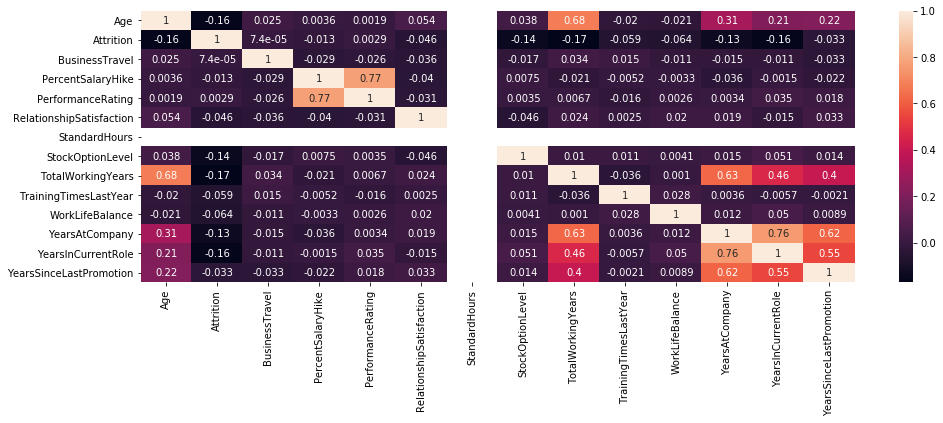

In [15]:
# Show correlation between variables
#independant_variables = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
#full_df = independant_variables.copy()
#full_df['target'] = dataset.target
#print(full_df.head())
plt.figure(figsize = (16,5))
sns.heatmap(dataset[['Age', 'Attrition', 'BusinessTravel', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']].corr(),annot =True)

# Valid Keywords

'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'

In [16]:
dataset.describe()

Age    Attrition  BusinessTravel    DailyRate   Department  \
count  2940.000000  2940.000000     2940.000000  2940.000000  2940.000000   
mean     36.923810     0.161224        1.607483   802.485714     1.260544   
std       9.133819     0.367800        0.665342   403.440447     0.527703   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     0.000000        1.000000   465.000000     1.000000   
50%      36.000000     0.000000        2.000000   802.000000     1.000000   
75%      43.000000     0.000000        2.000000  1157.000000     2.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EmployeeCount  \
count       2940.000000  2940.000000     2940.000000         2940.0   
mean           9.192517     2.912925        2.247619            1.0   
std            8.105485     1.023991        1.331143            0.0   
min            1.000000     1.000000        0.000000            1.0   
25%            2.000000     2.000000        1.000000            1.0   
50%            7.000000     3.000000        2.000000            1.0   
75%           14.000000     4.000000        3.000000            1.0   
max           29.000000     5.000000        5.000000            1.0   

       EmployeeNumber  ...  PerformanceRating  RelationshipSatisfaction  \
count     2940.000000  ...        2940.000000               2940.000000   
mean      1470.500000  ...           3.153741                  2.712245   
std        848.849221  ...           0.360762                  1.081025   
min          1.000000  ...           3.000000                  1.000000   
25%        735.750000  ...           3.000000                  2.000000   
50%       1470.500000  ...           3.000000                  3.000000   
75%       2205.250000  ...           3.000000                  4.000000   
max       2940.000000  ...           4.000000                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         2940.0       2940.000000        2940.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.851932           7.779458   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            2940.000000      2940.000000     2940.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289051         0.706356        6.125483   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  
count         2940.000000              2940.000000  
mean             4.229252                 2.187755  
std              3.622521                 3.221882  
min              0.000000                 0.000000  
25%              2.000000                 0.000000  
50%              3.000000                 1.000000  
75%              7.000000                 3.000000  
max             18.000000                15.000000  

[8 rows x 33 columns]

In [17]:
dataset.Attrition.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

# Checking Key units which have no contribution to the analysis.

> ## Employee count, Standard hours need to be dropped

In [18]:
new_ds= dataset.drop(['EmployeeCount', 'StandardHours'], axis=1)
new_ds.keys()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')

In [19]:
# Check for correlation to Attrition
#for column in new_ds.columns:
#    plt.scatter(new_ds[column], new_ds['Attrition'], edgecolors='r')
#    plt.xlabel()
#    plt.ylabel('Attrition')
#    plt.title('Correlation plots')
#plt.show()

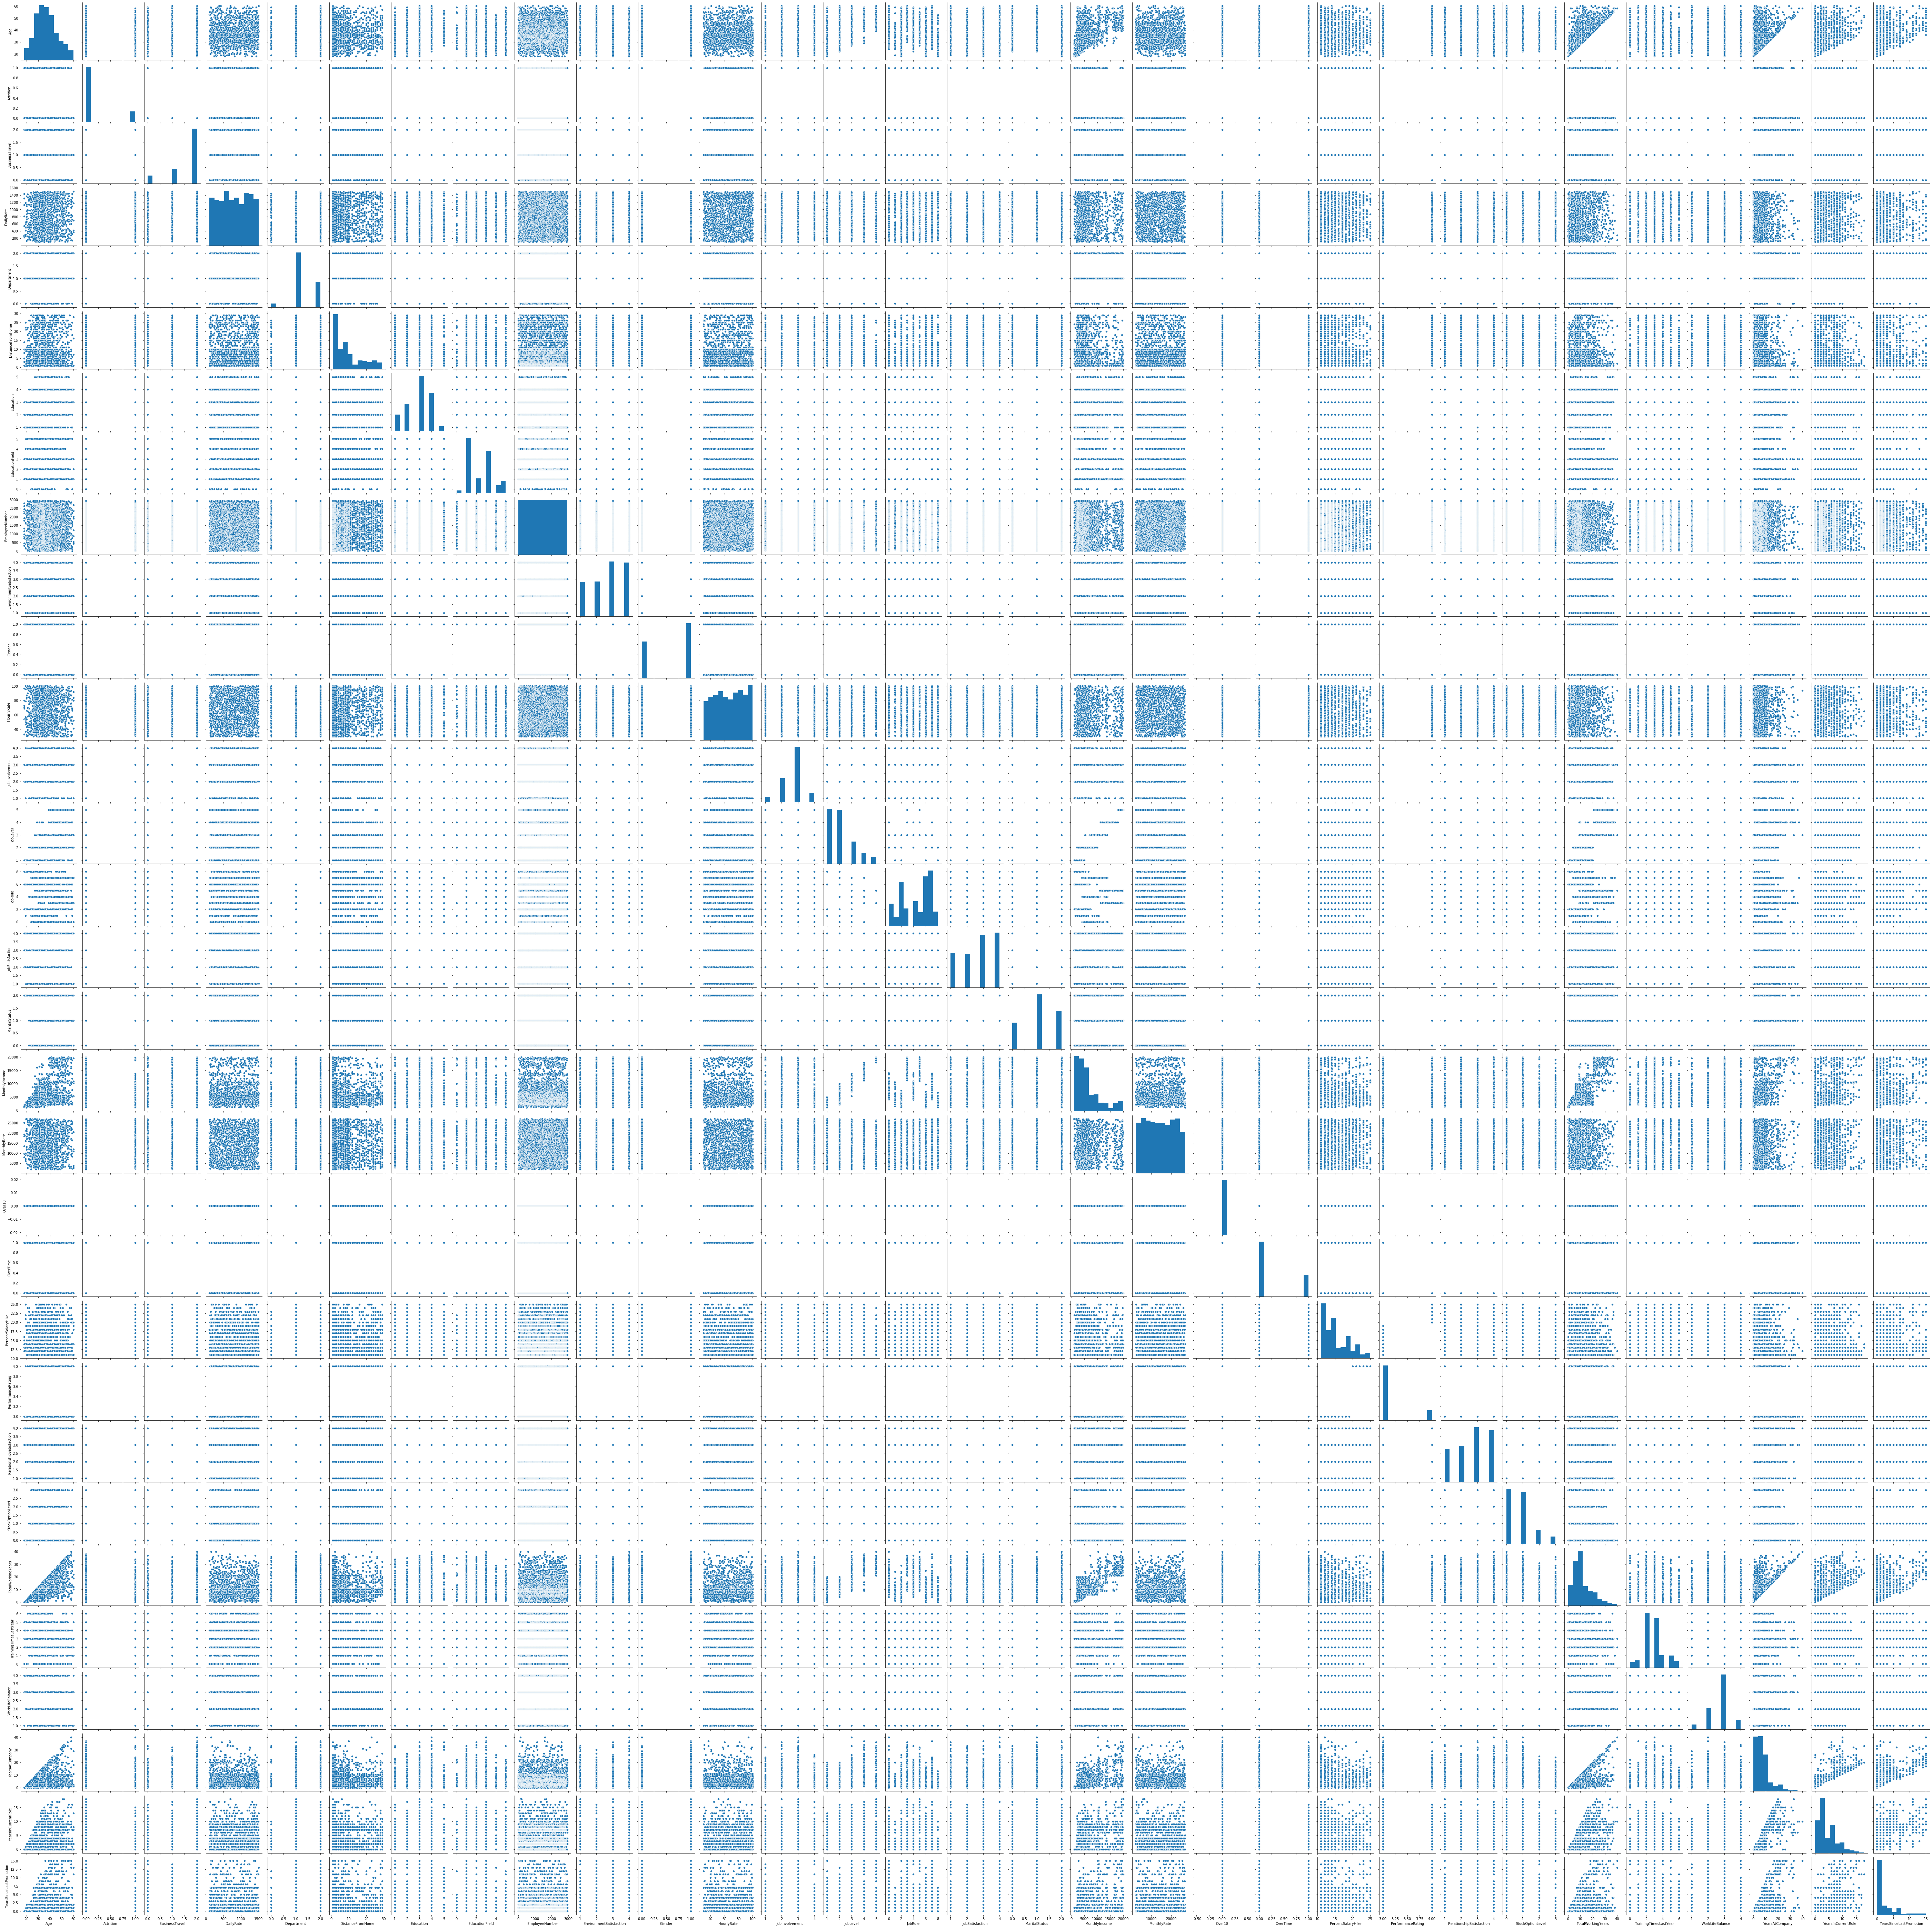

In [20]:
sns.pairplot(new_ds)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = new_ds.loc[:,new_ds.columns!='Attrition']
y = new_ds.loc[:,new_ds.columns=='Attrition']
#Standardization of a dataset is a common requirement for many machine learning estimators:
#they might behave badly if the individual features do not more or less look like standard normally distributed data
#(e.g. Gaussian with 0 mean and unit variance).
#x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2205, 30)
(735, 30)
(2205, 1)
(735, 1)


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

# Using Logestic regression to define the model and Analyse

In [49]:
# Normal logistic regression model
#logreg = LogisticRegression()

In [50]:
# Optimized with C (Inverse Regularization strength (Lambda) - logistic regression model
# logreg = LogisticRegression(C=100.0)

In [51]:
# Optimized with C (Inverse Regularization strength (Lambda) - logistic regression model
#logreg = LogisticRegression(solver ='newton-cg',max_iter=1000,n_jobs =2)

In [52]:
#logreg

In [53]:
# Performing Random forest analysis for comparing model accuracy
RF = RandomForestClassifier()

In [54]:
model = RF.fit(x_train, y_train)

C:\Users\nitwi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [55]:
# Predict the test and train data set
preds_test = model.predict(x_test)
preds_train = model.predict(x_train)

In [56]:
# Check Model Accuracy
# For Ordinal data - Train Accuracy: 0.8684807256235828
# print(accuracy_score(y_train,preds))
# print(accuracy_score(y_test,preds))
# print("Accuracy Train:",preds.score(x_train,y_train))
print("Train Accuracy:", model.score(x_train,y_train))

Train Accuracy: 1.0


In [57]:
# For Ordinal data - Test Accuracy: 0.8761904761904762
print("Test Accuracy:", model.score(x_test,y_test))

Test Accuracy: 0.9510204081632653


In [58]:
# Confusion Matrix
# For Ordinal data: test - [[612  16]
#                    [ 75  32]]
print(confusion_matrix(y_test, preds_test))

[[603   3]
 [ 33  96]]


In [59]:
# For Ordinal data: Train -[[1788   50]
#                    [ 240  127]]
print(confusion_matrix(y_train, preds_train))

[[1860    0]
 [   0  345]]


In [60]:
# Create Classification report
print(classification_report(y_test,preds_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       606
           1       0.97      0.74      0.84       129

    accuracy                           0.95       735
   macro avg       0.96      0.87      0.91       735
weighted avg       0.95      0.95      0.95       735



# Ordinal Data - Classificaton test:
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       632
         1.0       0.59      0.35      0.44       103

    accuracy                           0.87       735
   macro avg       0.75      0.65      0.68       735
weighted avg       0.86      0.87      0.86       735

In [61]:
print(classification_report(y_train,preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1860
           1       1.00      1.00      1.00       345

    accuracy                           1.00      2205
   macro avg       1.00      1.00      1.00      2205
weighted avg       1.00      1.00      1.00      2205



# Ordinal Data - Classificaton train:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      1838
         1.0       0.72      0.35      0.47       367

    accuracy                           0.87      2205
   macro avg       0.80      0.66      0.70      2205
weighted avg       0.85      0.87      0.85      2205

##### Analysis
1. Accuracy of Train and Test Model based on Numeric encoder - 87% and 85%
2. Accuracy  of Train abd Test model based on Ordinal encoder - 86% and 87%
3. Precision of Train and Test model based on Oridinal encoder - 88% and 90%
4. Precision of Train and Test Model based on Numeric encoder - 89% and 87%
5. Recall of Train and Test Model based on Numeric encoder - Both 32%
6. Recall of Train and Test Model based on Ordinal encoder - both 35%

This shows that we need a better dataset as the model can only predict 32 to 35% of employees who leave the company based on the dataset and does not account for the remaning ~65% who leave the organization

7. Ratio of Attrition data - Percent staying back to leaving 87% and 13%

This shows we need to add more data related to employees leaving to get the percentage up to 50% atleast to get a better outcome.

#### Based on the analysis from Heat map

1. Parameters such as Age, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole negatively impact Attrition. i.e the higher these values employees are more prone to leave the company.
2. Business travel and Performance rating show a low but fairly descent controbution to Attrition positively. i.e higher these values more likely the employees tend to stay.

##### Analysis for Random forest model which is not Standard Scalar

1. Accuracy of Train and Test Model - 100% and 95%
2. Precision of Train and Test model - 100% and 97%
3. Recall of Train and Test Model - 100% and 74%

This shows that the dataset works better with the Random forest model but explains less about the relating parameters. 

4. Model is slightly overfitted and hence cannot use this as validation for accurate analysis.